# Лабораторная работа по теме: Обработка естественного языка

In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AlexB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AlexB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AlexB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import WordNetLemmatizer

In [3]:
df = pd.read_csv('dataset.csv')
df.head(15)

,text,style,theme
0,АРХИТЕКТУРА В АНТРОПОЛОГИЧЕСКОМ ИЗМЕРЕНИИ\n\nГ...,научный,Культура
1,«Затем король упоминает о красивом доме канцле...,научный,Культура
2,"Основная проблема, связанная с использованием ...",научный,Культура
3,3 января в Доме культуры «Соболевский» прошел ...,официально-деловой,Культура
4,Отчёты по мероприятиям 2020-2022\n30.12.2022 Ю...,официально-деловой,Культура
5,Отчет о работе учреждений культуры Красносулин...,официально-деловой,Культура
6,Москва\n«Настройки-3» в «ГЭС-2»\nДо 12 марта\n...,публицистический,Культура
7,Выбрали главные сериалы грядущего сезона. Сред...,публицистический,Культура
8,Кембриджский университет изучил результаты кру...,публицистический,Культура
9,Господа! А нельзя ли в рамках нового закона за...,разговорный,Культура


In [4]:
df['theme'].value_counts()

Культура     15
Наука        15
Политика     15
Экономика    15
Name: theme, dtype: int64

In [5]:
def build_dict_lex(text):
    tokens = nltk.word_tokenize(text, language = 'russian')
    freq_dict = defaultdict(int)
    for token in tokens:
        freq_dict[token.lower()] += 1
    return freq_dict

In [6]:
def build_dict_word(text):
    tokens = nltk.word_tokenize(text, language = 'russian')
    freq_dict = defaultdict(int)
    for token in tokens:
        freq_dict[token] += 1
    return freq_dict

In [7]:
def build_dict_pos(text):
    tokens = nltk.word_tokenize(text, language="russian")
    tagged_tokens = nltk.pos_tag(tokens)
    freq_dict = defaultdict(int)
    for token, pos in tagged_tokens:
        freq_dict[pos] += 1
    return freq_dict

In [8]:
def jaccard_similarity(v1, v2):
    num = len(set(v1.keys()) & set(v2.keys()))
    denom = len(set(v1.keys()) | set(v2.keys()))
    return num / denom

def cosine_similarity(v1, v2):
    dot_product = sum(v1[key] * v2.get(key, 0) for key in v1)
    norm_v1 = math.sqrt(sum(v1[key]**2 for key in v1))
    norm_v2 = math.sqrt(sum(v2[key]**2 for key in v2))
    return dot_product / (norm_v1 * norm_v2)

def euclidean_distance(v1, v2):
    common_keys = set(v1.keys()) & set(v2.keys())
    return math.sqrt(sum((v1.get(k, 0) - v2.get(k, 0))**2 for k in common_keys))

In [9]:
lex_docs = []
word_docs = []
pos_docs = []
for i, row in df.iterrows():
    text = row['text']
    freq_dict_lex = build_dict_lex(text)
    freq_dict_word = build_dict_word(text)
    freq_dict_pos = build_dict_pos(text)
    lex_docs.append(freq_dict_lex)
    word_docs.append(freq_dict_word)
    pos_docs.append(freq_dict_pos)

In [10]:
proximity_measures = ['jaccard', 'cosine', 'euclidean']
document_vector_methods = ['lex', 'word', 'pos']
for measure in proximity_measures:
    for method in document_vector_methods:
        similarity_matrix = np.zeros((len(df), len(df)))
        for i, vec1 in enumerate(eval(f'{method}_docs')):
            for j, vec2 in enumerate(eval(f'{method}_docs')):
                if i == j:
                    similarity_matrix[i, j] = 1
                    continue
                if measure == 'jaccard':
                    similarity = jaccard_similarity(vec1, vec2)
                elif measure == 'cosine':
                    similarity = cosine_similarity(vec1, vec2)
                elif measure == 'euclidean':
                    similarity = euclidean_distance(vec1, vec2)
                
                similarity_matrix[i, j] = similarity
        np.savetxt(f'matrix/{measure}_{method}.csv', similarity_matrix, delimiter=',')

In [11]:
jl = pd.read_csv('matrix/cosine_lex.csv')
jl.head()

,1.000000000000000000e+00,7.064328450001462478e-01,6.652511083353386256e-01,6.203811918616227716e-01,6.791156266672880859e-01,6.576582456514441510e-01,7.206349479976570382e-01,7.059609232163848169e-01,6.639142354221230224e-01,4.587073805509153113e-01,...,3.148804990385885572e-01,6.843350259498220955e-01,6.783124585436763887e-01,7.017640870352638283e-01,1.621435169753474848e-01,4.159061021743248321e-01,4.614137921638925000e-01,6.878801762199189263e-01,6.978415786635694396e-01,6.843168171446707415e-01
0,0.706433,1.000000,0.723744,0.679428,0.739403,0.742935,0.755580,0.764749,0.741436,0.510665,...,0.346696,0.722424,0.778171,0.760743,0.196466,0.460687,0.522423,0.786265,0.773864,0.781018
1,0.665251,0.723744,1.000000,0.679253,0.689853,0.682778,0.732364,0.738991,0.669786,0.486061,...,0.312463,0.609285,0.677291,0.709927,0.195404,0.412329,0.462023,0.699583,0.707894,0.710953
2,0.620381,0.679428,0.679253,1.000000,0.746215,0.670139,0.746861,0.744199,0.639212,0.461079,...,0.324491,0.600148,0.593044,0.658972,0.196435,0.421583,0.500564,0.653413,0.625619,0.626113
3,0.679116,0.739403,0.689853,0.746215,1.000000,0.716175,0.732487,0.709892,0.700462,0.500813,...,0.330218,0.698263,0.647180,0.701067,0.179552,0.428615,0.518559,0.750498,0.718402,0.724558
4,0.657658,0.742935,0.682778,0.670139,0.716175,1.000000,0.710011,0.737979,0.691555,0.488535,...,0.274445,0.615743,0.730296,0.677475,0.153390,0.348325,0.402826,0.755093,0.783265,0.756992


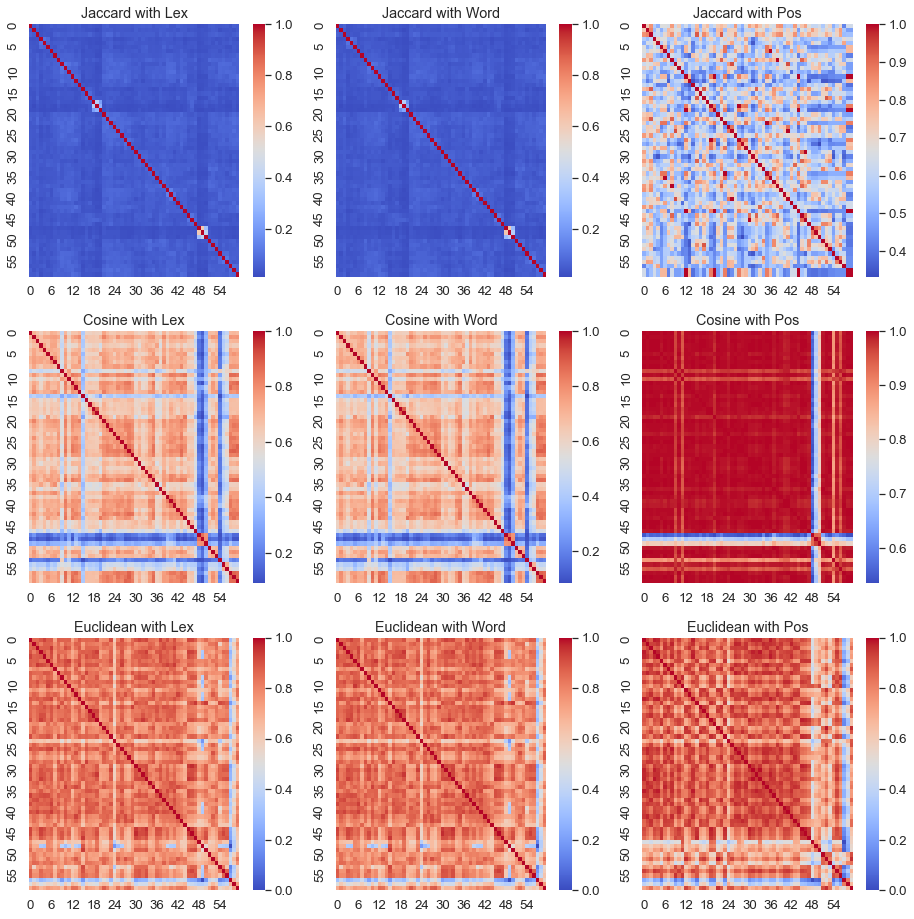

In [18]:
fig, axs = plt.subplots(len(proximity_measures), len(document_vector_methods), figsize=(13, 13))

for i, measure in enumerate(proximity_measures):
    for j, method in enumerate(document_vector_methods):
        similarity_matrix = np.genfromtxt(f'matrix/{measure}_{method}.csv', delimiter=',')

        if measure == 'euclidean':
            max_distance = np.max(similarity_matrix)
            similarity_matrix = 1 - (similarity_matrix / max_distance)

        for k in range(len(similarity_matrix)):
            similarity_matrix[k, k] = 1

        ax = sns.heatmap(similarity_matrix, ax=axs[i, j], cmap='coolwarm')
        ax.set_title(f'{measure.capitalize()} with {method.capitalize()}')

plt.tight_layout()
plt.savefig('images/heatmap.png', dpi = 100 ) 

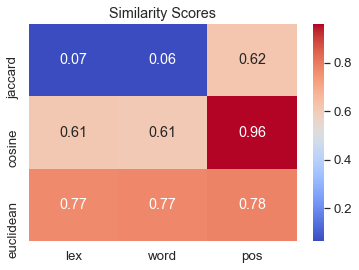

In [13]:
similarity_matrix = np.zeros((len(proximity_measures), len(document_vector_methods)))

for i, measure in enumerate(proximity_measures):
    for j, method in enumerate(document_vector_methods):
        data = np.genfromtxt(f'matrix/{measure}_{method}.csv', delimiter=',')
        if measure == 'euclidean':
            max_distance = np.max(data)
            data = 1 - (data / max_distance)
        mean_similarity = np.mean(data)
        similarity_matrix[i, j] = mean_similarity

sns.set(font_scale=1.2)
ax = sns.heatmap(similarity_matrix, cmap='coolwarm', annot=True, fmt='.2f',
                 xticklabels=document_vector_methods, yticklabels=proximity_measures)
ax.set_title('Similarity Scores')
plt.savefig('images/similarity_scores.png', dpi = 100 ) 

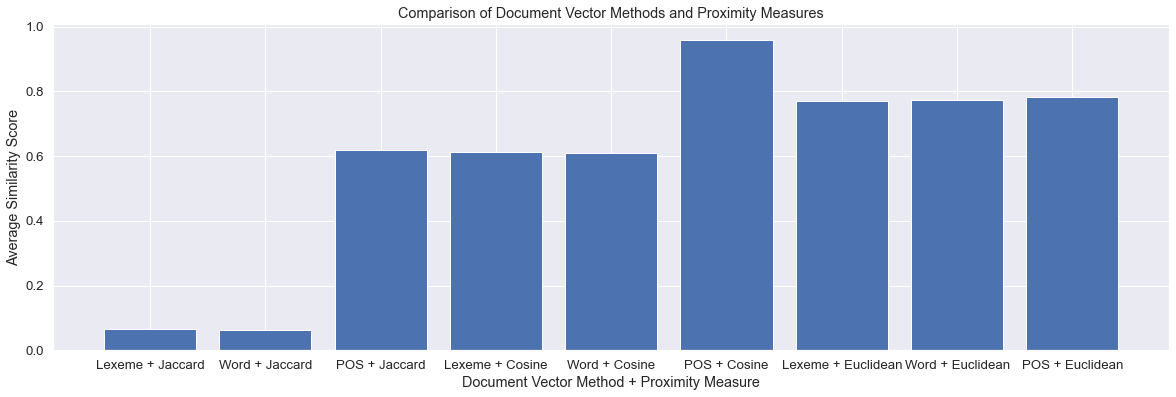

In [14]:
jaccard_lex = np.loadtxt('matrix/jaccard_lex.csv', delimiter=',')
jaccard_word = np.loadtxt('matrix/jaccard_word.csv', delimiter=',')
jaccard_pos = np.loadtxt('matrix/jaccard_pos.csv', delimiter=',')
cosine_lex = np.loadtxt('matrix/cosine_lex.csv', delimiter=',')
cosine_word = np.loadtxt('matrix/cosine_word.csv', delimiter=',')
cosine_pos = np.loadtxt('matrix/cosine_pos.csv', delimiter=',')
euclidean_lex = np.loadtxt('matrix/euclidean_lex.csv', delimiter=',')
euclidean_word = np.loadtxt('matrix/euclidean_word.csv', delimiter=',')
euclidean_pos = np.loadtxt('matrix/euclidean_pos.csv', delimiter=',')

jaccard_lex_avg = np.mean(jaccard_lex)
jaccard_word_avg = np.mean(jaccard_word)
jaccard_pos_avg = np.mean(jaccard_pos)

cosine_lex_avg = np.mean(cosine_lex)
cosine_word_avg = np.mean(cosine_word)
cosine_pos_avg = np.mean(cosine_pos)

max_distance = np.max(euclidean_lex)
data = 1 - (euclidean_lex / max_distance)
euclidean_lex_avg = np.mean(data)

max_distance = np.max(euclidean_word)
data = 1 - (euclidean_word / max_distance)
euclidean_word_avg = np.mean(data)

max_distance = np.max(euclidean_pos)
data = 1 - (euclidean_pos / max_distance)
euclidean_pos_avg = np.mean(data)

results = pd.DataFrame({
    'Document Vector Method': ['Lexeme', 'Word', 'POS']*3,
    'Proximity Measure': ['Jaccard']*3 + ['Cosine']*3 + ['Euclidean']*3,
    'Average Similarity Score': [
        jaccard_lex_avg, jaccard_word_avg, jaccard_pos_avg,
        cosine_lex_avg, cosine_word_avg, cosine_pos_avg,
        euclidean_lex_avg, euclidean_word_avg, euclidean_pos_avg
    ]
})

plt.figure(figsize=(20, 6))
plt.bar(results.index, results['Average Similarity Score'])
plt.xticks(results.index, results['Document Vector Method'] + ' + ' + results['Proximity Measure'])
plt.xlabel('Document Vector Method + Proximity Measure')
plt.ylabel('Average Similarity Score')
plt.title('Comparison of Document Vector Methods and Proximity Measures')
plt.savefig('images/comparison.png', dpi = 100 ) 

In [15]:
results

,Document Vector Method,Proximity Measure,Average Similarity Score
0,Lexeme,Jaccard,0.065392
1,Word,Jaccard,0.062866
2,POS,Jaccard,0.619045
3,Lexeme,Cosine,0.612036
4,Word,Cosine,0.608436
5,POS,Cosine,0.959474
6,Lexeme,Euclidean,0.769053
7,Word,Euclidean,0.772908
8,POS,Euclidean,0.783564


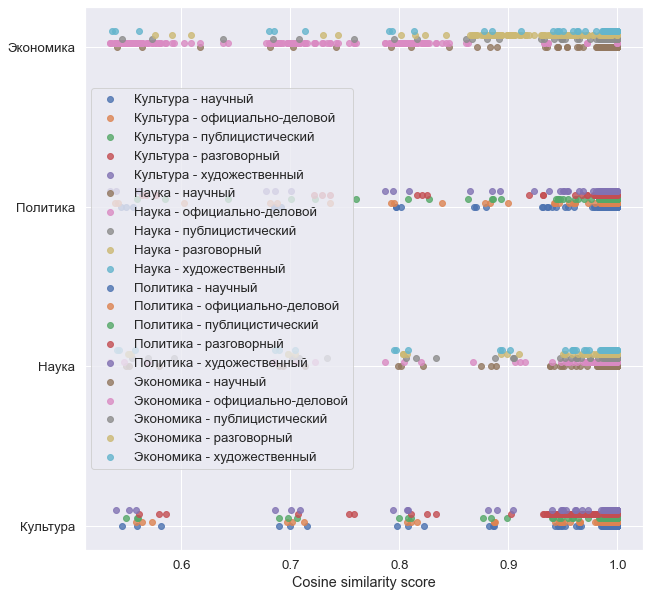

In [50]:
measure = 'cosine'
method = 'pos'

similarity_matrix = np.genfromtxt(f'matrix/{measure}_{method}.csv', delimiter=',')
if measure == 'euclidean':
    max_distance = np.max(similarity_matrix)
    similarity_matrix = 1 - (similarity_matrix / max_distance)

theme_labels = df['theme'].unique()
style_labels = df['style'].unique()

fig, ax = plt.subplots(figsize=(10, 10))
for i, theme in enumerate(theme_labels):
    theme_mask = df['theme'] == theme
    for j, style in enumerate(style_labels):
        style_mask = df['style'] == style
        mask = theme_mask & style_mask
        similarity_scores = similarity_matrix[mask].flatten()
        ax.scatter(similarity_scores, [i+j*0.025]*len(similarity_scores), label=f'{theme} - {style}', alpha=0.8)

ax.set_yticks(range(len(theme_labels)))
ax.set_yticklabels(theme_labels)
ax.set_xlabel(f'{measure.capitalize()} similarity score')
legend = ax.legend(bbox_to_anchor=(0, 1), loc='lower center')
plt.legend()
fig.savefig('images/relationship.png', dpi=100)
